In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', header=0, index_col='project id')

In [4]:
df.head()

,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.category = df.category.str.replace('Film &amp; Video', 'Film & Video')

In [7]:
df.head()

,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [8]:
df.isnull().sum()

name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded_percentage       0
backers                 0
funded_date             0
levels                  0
reward_levels          59
updates                 0
comments                0
duration                0
dtype: int64

#### What is the mean (total) pledge that projects get? (not per backer)

In [9]:
df['pledged'].mean()

4980.749678963979

#### Create a histogram that shows the distribution for number of backers

In [10]:
%matplotlib inline

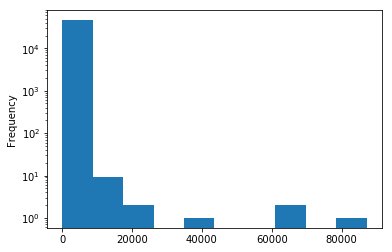

In [11]:
df.backers.plot(kind='hist', logy=True)

In [41]:
df.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

#### Is the ‘duration’ variable normally distributed?

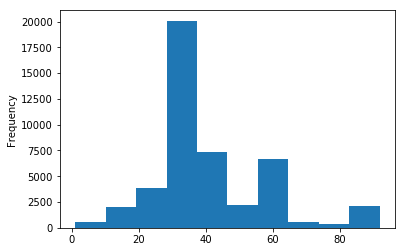

In [12]:
df.duration.plot(kind='hist')

In [42]:
df.duration.describe()

count    45957.000000
mean        39.995547
std         17.414458
min          1.000000
25%         30.000000
50%         32.000000
75%         48.390000
max         91.960000
Name: duration, dtype: float64

In [13]:
stats.mstats.normaltest(df.duration)

NormaltestResult(statistic=6985.5754355009585, pvalue=0.0)

#### What's the best length of time to run a campaign?

In [14]:
df.status = df.status.astype('category')

In [15]:
df.groupby('status').duration.describe()

status           
canceled    count       59.000000
            mean        38.943220
            std         13.601183
            min         15.000000
            25%         30.000000
            50%         30.000000
            75%         57.725000
            max         60.000000
failed      count    18996.000000
            mean        42.977828
            std         18.691720
            min          1.000000
            25%         30.000000
            50%         36.000000
            75%         59.872500
            max         91.960000
live        count     3929.000000
            mean        37.499801
            std         12.688043
            min          7.000000
            25%         30.000000
            50%         30.000000
            75%         45.000000
            max         60.000000
successful  count    22969.000000
            mean        37.960475
            std         16.651234
            min          1.000000
            25%         30.000

In [16]:
df.groupby('status').duration.var()

status
canceled      184.992181
failed        349.380413
live          160.986440
successful    277.263585
suspended       0.000000
Name: duration, dtype: float64

In [17]:
stats.ttest_ind(df[df.status=='failed'].duration, df[df.status=='successful'].duration, equal_var=False)

Ttest_indResult(statistic=28.746477534676764, pvalue=8.0920713757277501e-180)

In [18]:
stats.ttest_ind(df[df.status=='canceled'].duration, df[df.status=='successful'].duration, equal_var=False)

Ttest_indResult(statistic=0.55393132813094681, pvalue=0.58173902503156427)

In [19]:
stats.ttest_ind(df[df.status=='canceled'].duration, df[df.status=='failed'].duration, equal_var=False)

Ttest_indResult(statistic=-2.2718551478252449, pvalue=0.026776508793292984)

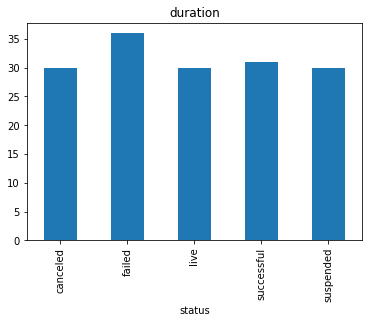

In [77]:
df.groupby('status').duration.median().plot(kind='bar', title='duration')

#### What's the ideal pledge goal?

In [21]:
df.goal.describe()

count    4.595700e+04
mean     1.194271e+04
std      1.887583e+05
min      1.000000e-02
25%      1.800000e+03
50%      4.000000e+03
75%      9.862000e+03
max      2.147484e+07
Name: goal, dtype: float64

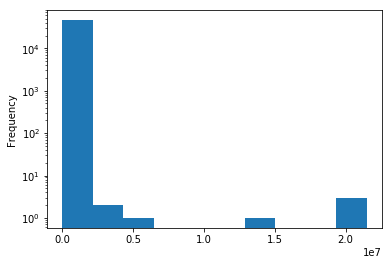

In [22]:
df.goal.plot(kind='hist', logy=True)

In [23]:
stats.mstats.normaltest(df.goal)

NormaltestResult(statistic=183201.40366108515, pvalue=0.0)

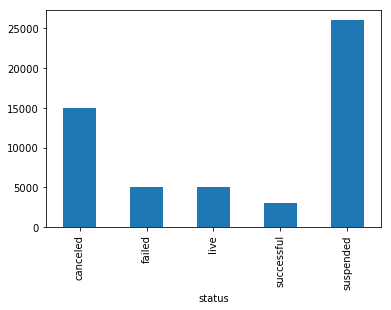

In [24]:
df.groupby('status').goal.median().plot(kind='bar')

In [25]:
df.groupby('status').goal.median()

status
canceled      15000.0
failed         5000.0
live           5000.0
successful     3000.0
suspended     26000.0
Name: goal, dtype: float64

In [26]:
df.groupby('status').goal.var()

status
canceled      9.832872e+09
failed        4.802337e+10
live          1.829744e+11
successful    1.528697e+08
suspended     7.117292e+08
Name: goal, dtype: float64

In [27]:
stats.ttest_ind(df[df.status=='failed'].goal, df[df.status=='successful'].goal, equal_var=False)

Ttest_indResult(statistic=6.8254956911691078, pvalue=9.0252510807034373e-12)

#### What type of projects would be most successful at getting funded?

In [28]:
def calculate_success_rate(attribute1, attribute2=df.status):
    crosstab_df = pd.crosstab(attribute1, attribute2)
    return crosstab_df.successful / (crosstab_df.canceled + crosstab_df.failed + crosstab_df.successful + crosstab_df.suspended)

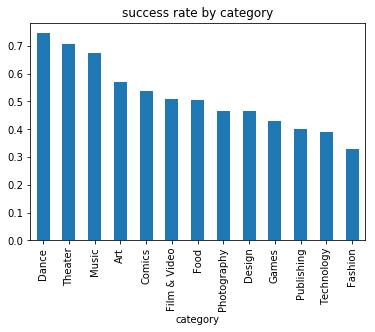

In [29]:
calculate_success_rate(df.category).sort_values(ascending=False).plot(kind='bar', title='success rate by category')

#### Is there an ideal month/day/time to launch a campaign?

In [30]:
df.funded_date = pd.to_datetime(df.funded_date)

In [31]:
df['month'] = df.funded_date.dt.month
df['day'] = df.funded_date.dt.weekday_name
df['hour'] = df.funded_date.dt.hour

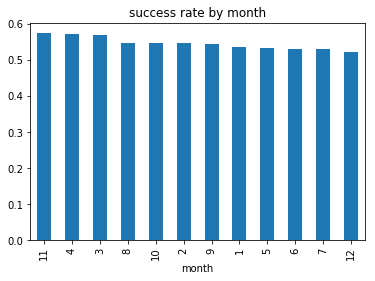

In [32]:
calculate_success_rate(df.month).sort_values(ascending=False).plot(kind='bar', title='success rate by month')

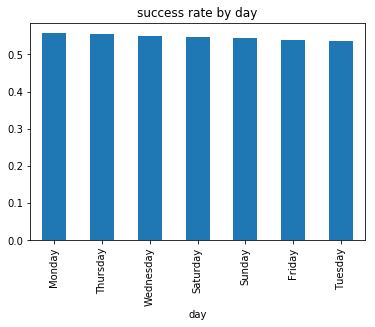

In [33]:
calculate_success_rate(df.day).sort_values(ascending=False).plot(kind='bar', title='success rate by day')

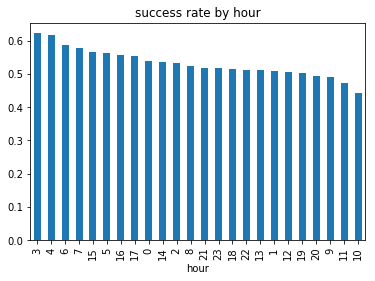

In [34]:
calculate_success_rate(df.hour).sort_values(ascending=False).plot(kind='bar', title='success rate by hour')

#### Is there any correlation between the update frequency and the success of the projects?

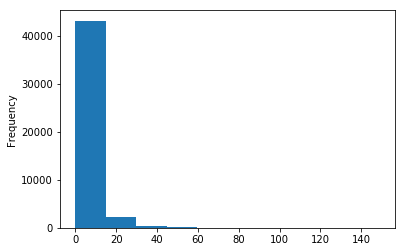

In [35]:
df.updates.plot(kind='hist')

In [36]:
df.groupby('status').updates.describe()

status           
canceled    count       59.000000
            mean         1.898305
            std          3.346099
            min          0.000000
            25%          0.000000
            50%          1.000000
            75%          2.500000
            max         20.000000
failed      count    18996.000000
            mean         1.496894
            std          3.237130
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          2.000000
            max         83.000000
live        count     3929.000000
            mean         1.418173
            std          2.738796
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          2.000000
            max         30.000000
successful  count    22969.000000
            mean         6.687144
            std          7.709163
            min          0.000000
            25%          2.000

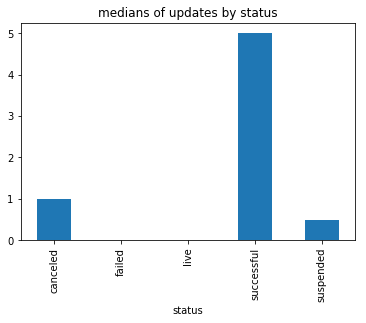

In [37]:
df.groupby('status').updates.median().plot(kind='bar', title='median updates by status')

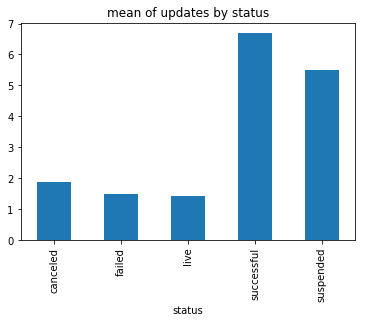

In [38]:
df.groupby('status').updates.mean().plot(kind='bar', title='mean updates by status')

In [39]:
df.groupby('status').updates.var()

status
canceled       11.196376
failed         10.479011
live            7.501004
successful     59.431201
suspended     107.000000
Name: updates, dtype: float64

In [40]:
stats.ttest_ind(df[df.status=='failed'].updates, df[df.status=='successful'].updates, equal_var=False)

Ttest_indResult(statistic=-92.637313686695634, pvalue=0.0)

#### Is there any correlation between the number of comments and the success of the projects?

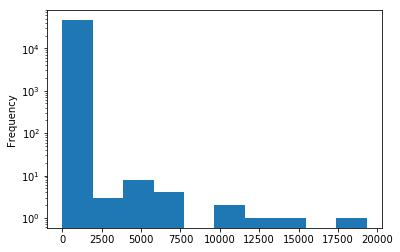

In [71]:
df.comments.plot(kind='hist', logy=True)

In [72]:
df.groupby('status').comments.describe()

status           
canceled    count       59.000000
            mean        19.406780
            std        115.371083
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          2.500000
            max        876.000000
failed      count    18996.000000
            mean         0.963361
            std          4.886985
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          1.000000
            max        442.000000
live        count     3929.000000
            mean         8.939679
            std        161.822939
            min          0.000000
            25%          0.000000
            50%          0.000000
            75%          2.000000
            max       6895.000000
successful  count    22969.000000
            mean        14.386564
            std        236.591264
            min          0.000000
            25%          0.000

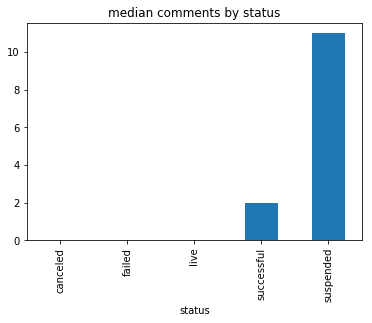

In [73]:
df.groupby('status').comments.median().plot(kind='bar', title='median comments by status')

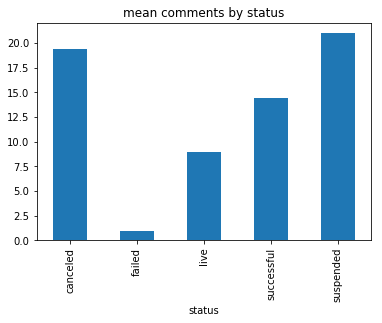

In [74]:
df.groupby('status').comments.mean().plot(kind='bar', title='mean comments by status')

In [75]:
df.groupby('status').comments.var()

status
canceled      13310.486850
failed           23.882627
live          26186.663621
successful    55975.426188
suspended       816.666667
Name: comments, dtype: float64

In [76]:
stats.ttest_ind(df[df.status=='failed'].comments, df[df.status=='successful'].comments, equal_var=False)

Ttest_indResult(statistic=-8.5963982290253647, pvalue=8.7417511055173352e-18)

#### Number of backers

In [46]:
df.groupby('status').backers.describe()

status           
canceled    count       59.000000
            mean        39.966102
            std        131.043158
            min          0.000000
            25%          1.000000
            50%          8.000000
            75%         19.500000
            max        918.000000
failed      count    18996.000000
            mean        12.569962
            std         27.141372
            min          0.000000
            25%          1.000000
            50%          4.000000
            75%         14.000000
            max        882.000000
live        count     3929.000000
            mean        59.013489
            std        342.485178
            min          0.000000
            25%          2.000000
            50%         10.000000
            75%         33.000000
            max      13020.000000
successful  count    22969.000000
            mean       119.377814
            std        960.684332
            min          1.000000
            25%         29.000

In [43]:
stats.ttest_ind(df[df.status=='failed'].backers, df[df.status=='successful'].backers, equal_var=False)

Ttest_indResult(statistic=-16.841626926470749, pvalue=2.8936798268700084e-63)

#### levels

In [48]:
df.groupby('status').levels.describe()

status           
canceled    count       59.000000
            mean         9.254237
            std          4.439607
            min          1.000000
            25%          7.000000
            50%          9.000000
            75%         11.500000
            max         27.000000
failed      count    18996.000000
            mean         7.290061
            std          3.739939
            min          0.000000
            25%          5.000000
            50%          7.000000
            75%          9.000000
            max         70.000000
live        count     3929.000000
            mean         8.562993
            std          4.628804
            min          1.000000
            25%          6.000000
            50%          8.000000
            75%         10.000000
            max         70.000000
successful  count    22969.000000
            mean         8.496844
            std          4.455858
            min          0.000000
            25%          6.000

In [69]:
t, p = stats.ttest_ind(df[df.status=='failed'].levels, df[df.status=='successful'].levels, equal_var=False)
p < 0.05

True